In [1]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Extracting data

In [2]:
#Import dataset

ds=pd.read_csv('LRT_car.csv')
ds.head()

,Montly Salary,age,Y/N
0,2386,18,0
1,2486,19,0
2,2586,20,0
3,2686,20,0
4,2756,20,0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Montly Salary  400 non-null    int64
 1   age            400 non-null    int64
 2   Y/N            400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
#Checking null values
ds.isnull().sum()

Montly Salary    0
age              0
Y/N              0
dtype: int64

In [5]:
ds.dtypes

Montly Salary    int64
age              int64
Y/N              int64
dtype: object

# Explore Relationship Between Categorical & Target Variable

<AxesSubplot: xlabel='Y/N', ylabel='count'>

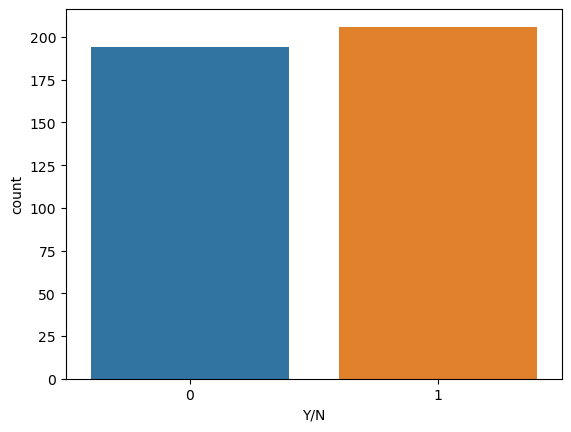

In [6]:
sns.countplot(x="Y/N", data= ds)

# 0 is LRT
# 1 is Car

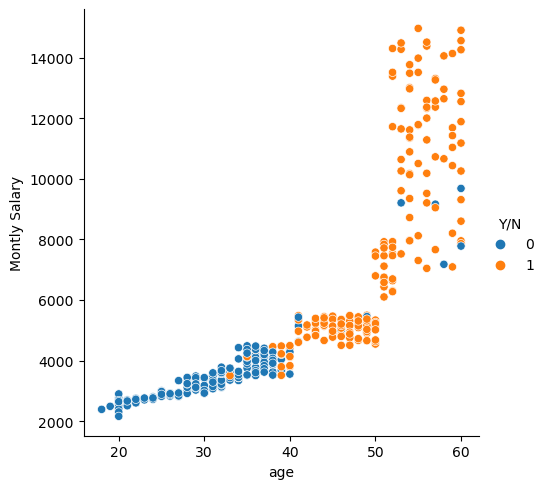

In [7]:
sns.relplot(x="age", y="Montly Salary", hue="Y/N", data=ds)

# 0 is LRT
# 1 is Car

# Defining the inputs and the target. Creating the train-test split.

In [8]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,2].values
#print x

In [9]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Performing the classification

In [10]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [11]:
#fitting Naïve Bayes Classifier to the training set 

from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

# Performing the evaluation on the test dataset¶

In [12]:
#Predict the test set results
y_pred=clf.predict(x_test)

In [13]:
#Making Confusion Matrix – to check whether the test set gives the correct result
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [14]:
cm

array([[47,  2],
       [ 8, 43]], dtype=int64)

# Predicting mode of transportation for individual that has salary=6000 and age=35

In [16]:
#transform kena buat sbb dah buat feature scling
xP=sc_x.transform([[6000,35]])
print(xP)

[[ 0.12620402 -0.49291847]]


In [17]:
prediction=clf.predict(xP)
print(prediction)

[0]


**Answer: prediction is 0 meaning that mode of transportation is a LRT.**